# Step 9: 2-D Diffusion

When we speak of 2-D diffusion, we mean the $\textit{diffusion of momentum}$ across a fluid control volume due to molecular thermal agitation; in fact, the diffusive term in Navier-Stokes equations (for an incompressible flow in a Newtonian fluid with constant viscosity) is obtained inserting the constitutive relation for Newtonian fluids, which links the applied shear stress (a stimulus) to a fluid volume and its response to that stimulus (the strain of the fluid element), in the more general $\textit{equations of motion}$ for a fluid. 

In this specific case, we are saying that the change of the speed $u$ is happening due to a diffusive process because it's described by this differential equation:

$$\frac{\partial u}{\partial t} = \nu\left(\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}\right)$$

where $u = u\left(x,\; y,\; t\right)$ is a function of space $\left(x,\; y\right)$ and time $t$, and $\nu$ (i.e. kinematic viscosity, given by $\nu = \frac{\mu}{\rho}$) is the momentum diffusivity.

Discretization is obtained via the same strategies adopted in previous notebooks and it leads to the following algebraic equation: 

$$u_{i,\; j}^{n+1} = u_{i,\; j}^n + \nu\frac{\Delta t}{\Delta x^2}\left(u_{i+1,\; j}^n - 2u_{i,\; j}^n + u_{i-1,\; j}^n\right) + \nu\frac{\Delta t}{\Delta y^2}\left(u_{i,\; j+1}^n - 2u_{i,\; j}^n + u_{i,\; j-1}^n\right)$$

This time the simulation timestep will be given as $dt = \sigma_{CFL} \times \Delta x \times \Delta y \times \frac{1}{\nu}$ and the ICs are given as the following:

$$u\left(x, y, 0\right) = \left\{ \begin{array}{rcl} 2 & for & 0.5 \leq x,y \leq 1 \\ 1 & for & 0 \leq\; x,y < 0.5\; \wedge\; 1 < x,y \leq\; 2 \end{array}\right. \,$$ 

With BCs set as $u\left(x,\; y\right) = 1$ for $\left(x,\; y\right)$ on the contour (where $x = 0,\;2 \vee y = 0,\; 2$).

$\textbf{NOTE}$: due to the uniform rectangular grid that I'm using (i.e. $\Delta x = \Delta y$), to the fact that $dt$ is defined as mentioned before and given a constant value of $\sigma_{CFL}$, the simulations __do not differ__ in any way. The only difference is the _real physical rate_ at which the system is evolving. Thus $n$ time steps for a system with $\nu = 0.5$ will produce the same result as $n$ time steps for a system with $\nu = 0.25$. What changes it __only__ the total _physical_ time of the simulation, which change accordingly to $\nu$ as $T_{total} \propto \frac{1}{\nu}$. Thus the same simulation can be used for different, but somehow related, physical settings!

For further readings, start from here:
- difference between diffusion, advection and convection: https://physics.stackexchange.com/questions/168218/what-is-the-exact-difference-between-diffusion-convection-and-advection
- convectione-diffusion equation: https://en.wikipedia.org/wiki/Convection%E2%80%93diffusion_equation
- Péclet number: https://en.wikipedia.org/wiki/P%C3%A9clet_number

## Animation

It's easy to get tired of doing Ctrl+Shift for several times in order to see the entire evolution of a system, thus I decided to try and implement an animation of the ongoing simulation. For now, the code is able to generate only a .gif file. That's because, in order to create an .mp4 one, I should install separately the FFmpeg software inside my Conda environment as suggested by the Matplotlib documentation (see: https://matplotlib.org/stable/users/explain/animations/animations.html#animations).

$\textbf{UPDATE}$: now it is possible to save a .mp4 video for the animation, in order to do it follow these instructions:
- install imageio-ffmpeg with *Jupyter notebook* cell or with your *Anaconda prompt* using
```
pip install imageio_ffmpeg
```
- then import it in *Jupyter notebook* along with some matplotlib module as matplotlib.pyplot:
```python
import imageio_ffmpeg
from matplotlib import pyplot as plt
```
- change the Runtime Configuration Parameters (rcParams) with the suggested line of code:
```python
plt.rcParams["animation.ffmpeg_path"] = imageio_ffmpeg.get_ffmpeg_exe()
```
- once you have your animation object called *ani*, execute the following:
```python
ani.save(filename="diffusion.mp4", writer="ffmpeg")
```

The full code is shown in the __Animation__ section of the **Step 9** notebook.

In [7]:
import numpy as np
import plotly.graph_objects as go
from matplotlib import pyplot as plt, cm
from mpl_toolkits.mplot3d import Axes3D
import imageio_ffmpeg
plt.rcParams["animation.ffmpeg_path"] = imageio_ffmpeg.get_ffmpeg_exe()

def diffuse(ICS, nt = 17, nx = 31, ny = 31, nu = 0.05, sigma = 0.25):
    dx = 2 / (nx - 1)
    dy = 2 / (ny - 1)
    dt = sigma*dx*dy/nu

    u = ICs.copy()
    un = np.zeros((nx, ny))

    for n in range(nt + 1):
        un = u.copy()
        u[1:-1,1:-1] = un[1:-1,1:-1] + (nu*dt/dx**2) * (un[2:,1:-1] - 2*un[1:-1,1:-1] + un[0:-2,1:-1]) + (nu*dt/dy**2) * (un[1:-1,2:] - 2*un[1:-1,1:-1] + un[1:-1,0:-2])
        
        # Boundary conditions:
        u[0,:] = 1
        u[-1,:] = 1
        u[:,0] = 1
        u[:,-1] = 1

    print("Max value of u:", end=' ')
    print(max(map(max, u)))

    x = np.linspace(0, 2, nx)
    y = np.linspace(0, 2, ny)
    
    # fig = plt.figure(figsize=(11,7))
    # ax = fig.add_subplot(111, projection='3d')
    # X, Y = np.meshgrid(x, y)
    # surf = ax.plot_surface(X, Y, u, cmap = cm.plasma)
    
    # ax.set_zlim(1.0, 2.0)
    # ax.set_xlabel('x coordinate')
    # ax.set_ylabel('y coordinate')
    # plt.show()

    fig = go.Figure(data=[go.Surface(z=u, x=x, y=y, name='u'), 
                      go.Surface(z=ICs, x=x, y=y, name='ICs', opacity=0.3)])
    fig.update_layout(title='Evolution', autosize=False, showlegend=False, 
                  width=900, height=500, 
                  margin=dict(l=65, r=50, b=10, t=50),
                  scene=dict(xaxis_title='x position', yaxis_title='y position', zaxis_title='Intensity'))

    fig.show()

In [10]:
nx = 101
ny = 101
nt = 300
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
nu = 0.75
sigma = 0.25
dt = sigma*dx*dy / nu

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

print("Total time of simulation:", nt*dt)
print("Time step:", dt)

ICs = np.ones((nx, ny))
ICs[int(0.75/dx):int(1.25/dx + 1), int(0.75/dy):int(1.25/dy + 1)] = 2

# X, Y = np.meshgrid(x, y)
# fig = plt.figure(figsize=(11,7))
# ax = fig.add_subplot(111, projection='3d')
# surf = ax.plot_surface(X, Y, ICs, cmap = cm.plasma)
# ax.set_xlabel('x coordinate')
# ax.set_ylabel('y coordinate')
# plt.show()

Total time of simulation: 0.04
Time step: 0.00013333333333333334


Max value of u: 1.5043578688582215


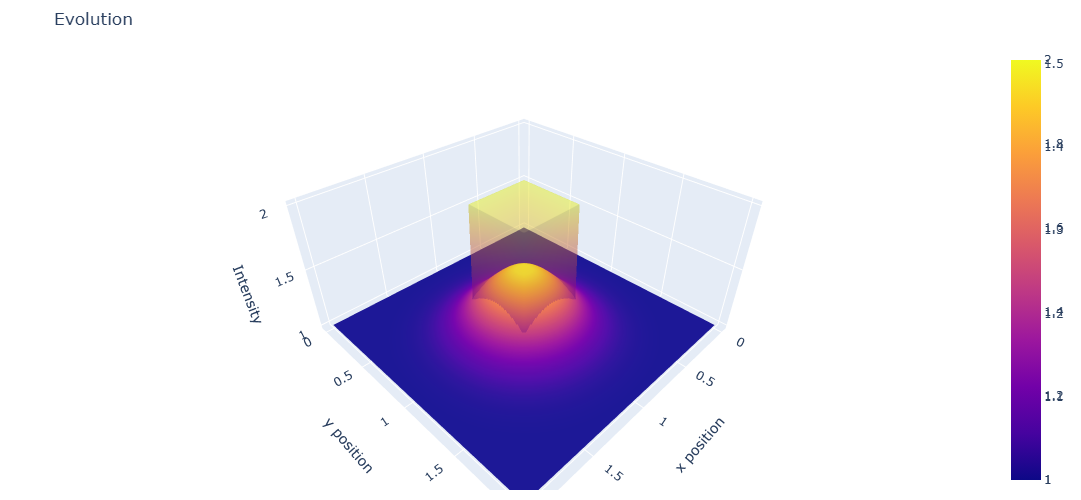

In [20]:
diffuse(ICs, nt=nt, nx=nx, ny=ny, nu=nu, sigma=sigma)

## Animation

In [ ]:
# Code for creation of an animation of the diffusion solution

import matplotlib.animation as animation
from IPython import display
import ipywidgets

# This is the version of 'diffuse' that you should use for the animation

def diffuse(ICS, nt = 17, nx = 31, ny = 31, nu = 0.05, sigma = 0.25):
    dx = 2 / (nx - 1)
    dy = 2 / (ny - 1)
    dt = sigma*dx*dy/nu

    u = ICs.copy()
    un = np.zeros((nx, ny))

    for n in range(nt + 1):
        un = u.copy()
        u[1:-1,1:-1] = un[1:-1,1:-1] + (nu*dt/dx**2) * (un[2:,1:-1] - 2*un[1:-1,1:-1] + un[0:-2,1:-1]) + (nu*dt/dy**2) * (un[1:-1,2:] - 2*un[1:-1,1:-1] + un[1:-1,0:-2])
        
        # Boundary conditions:
        u[0,:] = 1
        u[-1,:] = 1
        u[:,0] = 1
        u[:,-1] = 1

    return u

# %matplotlib widget

## Set the parameters of the animation:
# jump: width of the time interval over which calculate the Fourier transform
# nr_frames: number of frames in the video
# fps: frames per second of the video

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)
    
fig = plt.figure(figsize=(11,9))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
u = ICs.copy()
title = 'Diffusivity = ' + str(nu)
ax.set_title(title)
ax.plot_surface(X, Y, u, cmap = cm.plasma)
ax.set_xlabel('x coordinate')
ax.set_ylabel('y coordinate')
ax.set_zlim(1.0, 2.0)

# nr_frames = int((n_iter - 1)/jump)
nr_frames = 600
fps = 32   # 256 for .gif
total_time = nr_frames * dt

## Create the animation:
# skip: calculate the suitable index for the xth frame of the Et array,
# where n_iter is the total number of iterations
# skip = lambda x: int(x*n_iter / nr_frames)

def update(frame):

    ax.clear()
    u = diffuse(ICs, nt = frame, nx=nx, ny=ny, nu=nu, sigma=0.25)
    
    ## Update the line plot:
    ax.plot_surface(X, Y, u, cmap = cm.plasma)
    diff_eq = '$\\frac{\partial u}{\partial t} = \\nu \\left(\\frac{\partial^2 u}{\partial x^2} + \\frac{\partial^2 u}{\partial y^2} \\right)$'
    diff = f'$, \\; \\nu = {nu}$'
    time_update = f'Total time of simulation {total_time:.4f}' + '\nFrame: ' + str(frame + 1) + '/' + str(nr_frames)
    title = time_update + '\n\n' + diff_eq + diff
    # title = 'Diffusivity = ' + str(nu) + '\n' + 'frame = ' + str(frame + 1) + '/' + str(nr_frames) + '\n' + 'Total time of simulation: ' + str(total_time)
    ax.set_title(title)
    ax.set_xlabel('x coordinate')
    ax.set_ylabel('y coordinate')
    ax.set_zlim(1.0, 2.0)

    ## Update on the progress of computation
    print(frame, end = '\r')

ani = animation.FuncAnimation(fig = fig, func = update, frames = nr_frames, interval = 1000./fps, repeat = False)
# ani.save(filename = "diffusion_2d.gif", writer="pillow")
ani.save(filename=f"diffusion-{nu}.mp4", writer="ffmpeg")
# plt.show()
# %matplotlib inline